In [19]:
import pandas as pd
import numpy as np

In [20]:
df1 = pd.read_csv('R01_150_1_pos_CleanFnaBaC.csv')
df2 = pd.read_csv('R01_150_1_neg_CleanFnaBaC.csv')
df3 = pd.read_csv('R01_150_2_pos_CleanFnaBaC.csv')
df4 = pd.read_csv('R01_150_2_neg_CleanFnaBaC.csv')

In [3]:
# add an index to all isomer groups
df1['Mass_round'] = np.round(df1['Mass'], 2)
df1 = df1.sort_values(by=['Formula','Retention Time'])
df1 = df1.reset_index(drop=True)
df1['used_for_sorting'] = df1.index
df1['Mass_round'] = df1['Mass_round'].astype(str)
df1['rank'] = df1.groupby('Mass_round')['used_for_sorting'] \
    .rank(ascending = True, method = 'first')

df1['iso_id'] = df1['Mass_round'] + '_' + df1['rank'].astype(str)

In [4]:
# add an index to all isomer groups
df3['Mass_round'] = np.round(df3['Mass'], 2)
df3 = df3.sort_values(by=['Mass_round','Retention Time'])
df3 = df3.reset_index(drop=True)
df3['used_for_sorting'] = df3.index
df3['Mass_round'] = df3['Mass_round'].astype(str)
df3['rank'] = df3.groupby('Mass_round')['used_for_sorting'] \
    .rank(ascending = True, method = 'first')

df3['iso_id'] = df3['Mass_round'] + '_' + df3['rank'].astype(str)

In [5]:
datapos = pd.merge(df1, df3, on='iso_id', how='inner', suffixes=('_s1','_s2'))

In [6]:
# add an index to all isomer groups
df2['Mass_round'] = np.round(df2['Mass'], 2)
df2 = df2.sort_values(by=['Mass_round','Retention Time'])
df2 = df2.reset_index(drop=True)
df2['used_for_sorting'] = df2.index
df2['Mass_round'] = df2['Mass_round'].astype(str)
df2['rank'] = df2.groupby('Mass_round')['used_for_sorting'] \
    .rank(ascending = True, method = 'first')

df2['iso_id'] = df2['Mass_round'] + '_' + df2['rank'].astype(str)

In [7]:
# add an index to all isomer groups
df4['Mass_round'] = np.round(df4['Mass'], 2)
df4 = df4.sort_values(by=['Mass_round','Retention Time'])
df4 = df4.reset_index(drop=True)
df4['used_for_sorting'] = df4.index
df4['Mass_round'] = df4['Mass_round'].astype(str)
df4['rank'] = df4.groupby('Mass_round')['used_for_sorting'] \
    .rank(ascending = True, method = 'first')

df4['iso_id'] = df4['Mass_round'] + '_' + df4['rank'].astype(str)

In [8]:
dataneg = pd.merge(df2, df4, on='iso_id', how='inner', suffixes=('_s1','_s2'))

In [9]:
datapos['RT_diff'] = np.absolute(datapos['Retention Time_s1'] - datapos['Retention Time_s2'])

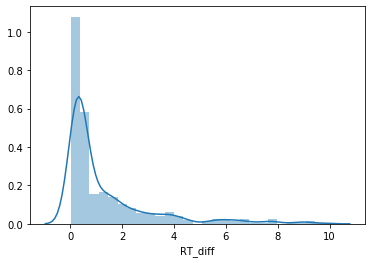

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

x = datapos['RT_diff']
sns.distplot(x)

In [11]:
datapos['RF_flag'] = np.where(datapos['RT_diff'] > 1, 1, 0)

In [12]:
datapos['RF_flag'].sum()

153

In [13]:
datapos.to_csv('datapos_clean.csv')
dataneg.to_csv('dataneg_clean.csv')

In [14]:
dfISpos = pd.read_csv('IS_pos_s12.csv')
dfISneg = pd.read_csv('IS_neg_s12.csv')

In [15]:
datapos = datapos.set_index('chem_id_s1')
dataneg = dataneg.set_index('chem_id_s1')

In [16]:
df_names = dfISpos['Sample Name']
datapos = datapos.loc[:, datapos.columns.isin(df_names)]

In [17]:
df_names = dfISneg['Sample Name']
dataneg = dataneg.loc[:, dataneg.columns.isin(df_names)]

In [18]:
datapos.to_csv('dataposR_clean.csv')
dataneg.to_csv('datanegR_clean.csv')